<h1> Building a Logistic Regression Model </h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import datetime

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("./cleaned_data.csv", index_col=0)

In [4]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
511205,08/02/2018,15:40,MANHATTAN,40.622476,-73.730705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
425974,12/22/2018,22:30,QUEENS,40.761780,-73.843590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
492340,09/07/2018,9:00,BROOKLYN,40.674683,-73.894600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10255,05/16/2021,15:00,BROOKLYN,40.666183,-73.868660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503164,09/01/2018,15:02,BRONX,40.904140,-73.905014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(32382, 13)

In [6]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'LATITUDE', 'LONGITUDE',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'],
      dtype='object')

In [7]:
df.isnull().sum()

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
LATITUDE                         0
LONGITUDE                        0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
dtype: int64

In [9]:
#Adding a new column for years
df["CRASH DATE"] = pd.to_datetime(df["CRASH DATE"])
df["year"] = df["CRASH DATE"].dt.year
df["year"].unique()

array([2018, 2021, 2019, 2020, 2016], dtype=int64)

In [10]:
#Adding a month column for months
df["month"] = df["CRASH DATE"].dt.month
df["month"].unique()

array([ 8, 12,  9,  5,  6,  7,  3, 10,  2, 11,  1,  4], dtype=int64)

In [11]:
# Setting our training and target variables
X = df.drop(["CRASH DATE", "CRASH TIME", "BOROUGH", "year", "month"], axis=1)
y = df["BOROUGH"]

In [12]:
#Splitting our dataset for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
#Model instantiation
logreg = LogisticRegression()

In [14]:
#Model fitting
logreg.fit(X_train, y_train)

LogisticRegression()

In [15]:
#Model Prediction
pred = logreg.predict(X_test)

In [16]:
#Checking our model accuracy
print(metrics.accuracy_score(y_test, pred))

0.6472332015810277


### Confusion Matrix ###

In [17]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[ 629    0   91  638    3]
 [   0 2582   93   64    4]
 [  13  584  164  686    1]
 [  31  212  170 1865    4]
 [   0  255    1    6    0]]


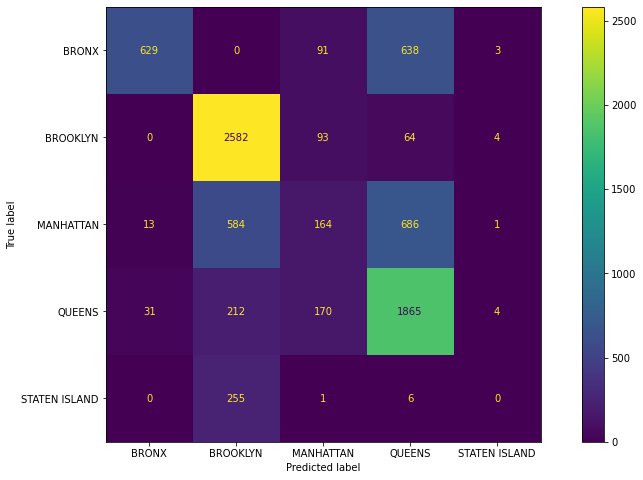

In [18]:
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(logreg, X_test, y_test, ax=ax)
plt.grid(False)

### Classification Report of our Model ###

In [19]:
#Classification report of our model
print(metrics.classification_report(y_test, pred))

               precision    recall  f1-score   support

        BRONX       0.93      0.46      0.62      1361
     BROOKLYN       0.71      0.94      0.81      2743
    MANHATTAN       0.32      0.11      0.17      1448
       QUEENS       0.57      0.82      0.67      2282
STATEN ISLAND       0.00      0.00      0.00       262

     accuracy                           0.65      8096
    macro avg       0.51      0.47      0.45      8096
 weighted avg       0.62      0.65      0.60      8096



<h1> <center> --- THE END --- </h1>